### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Time series analysis: decomposition
#### 3. Testing for stationarity
#### 4. Stationarizing the AQI India Data

#### 1. Importing your libraries and data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [25]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [26]:
#Importing daywise dataset of India AQI
path=r'C:\Users\User01\Analysing India Air Quality Data'
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'city_day.csv'))
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.shape

(29531, 16)

In [28]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


#### 2. Subsetting, wrangling, and cleaning time-series data

#### Let us pivot the values from the 'City' column, so that we can have a comparitive view of the value of every city's AQI through every day.

#### Then we resample them to find the mean of every month, so now our dataset contains month-wise data.

In [29]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#form a new column containing India's AQI for every month by taking the average of all cities for that month
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


<Axes: xlabel='Date'>

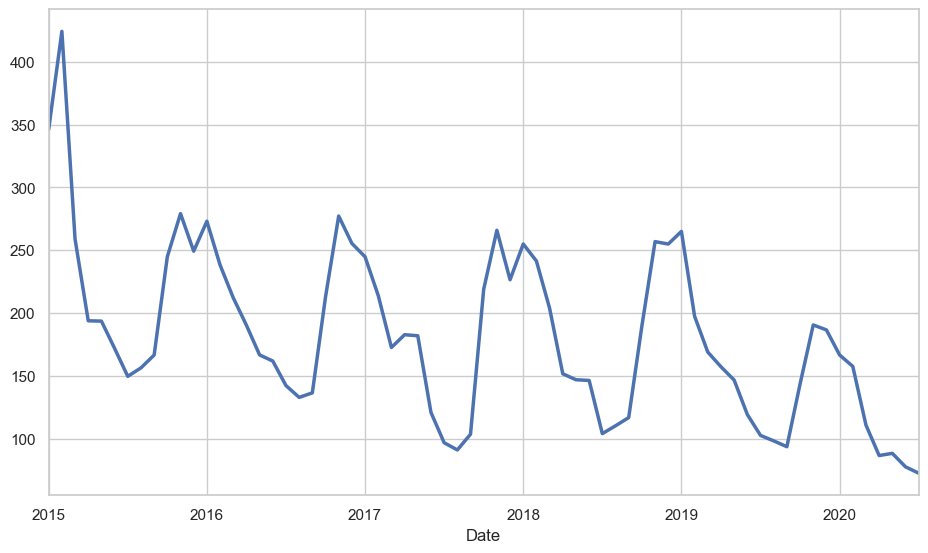

In [31]:
cities.reset_index()

sns.set_theme(style='whitegrid')

#plot India's AQI
cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)

### Based on the given graph, it is evident that there is a subtle decline and a noticeable seasonal pattern. Nevertheless, to gain a more comprehensive understanding, we will conduct a decomposition of the plot, separating it into trend, seasonality, and residuals, in order to enhance the clarity of our analysis.

### 3. Time-series analysis: decomposition

In [32]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(cities['India_AQI'], model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

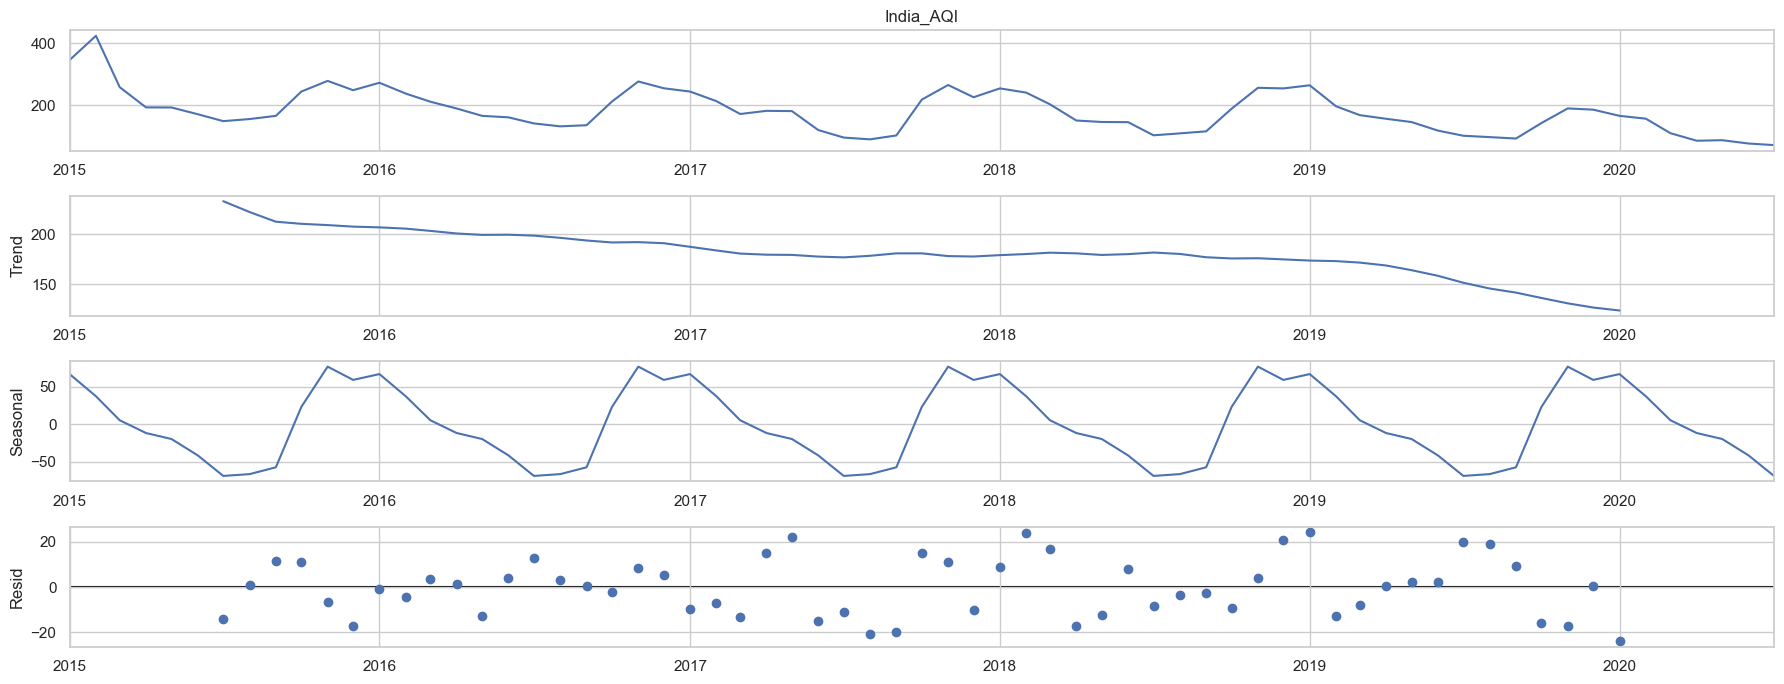

In [34]:
# Plot the separate components
decomposition.plot()
plt.show()

#### There is evident seasonality and a discernible trend in this data. The Air Quality Index (AQI) shows a decline during the middle of the year followed by a subsequent increase.

### 4. Testing for stationarity

In [35]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(cities['India_AQI'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.114224
p-value                         0.948003
Number of Lags Used            10.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


#### The obtained p-value of 0.94 indicates that the time series lacks stationarity. To address this, we employ first-order differencing to eliminate the trend and subsequently conduct a retest using the ADF test.

#### 5. Stationarizing Data

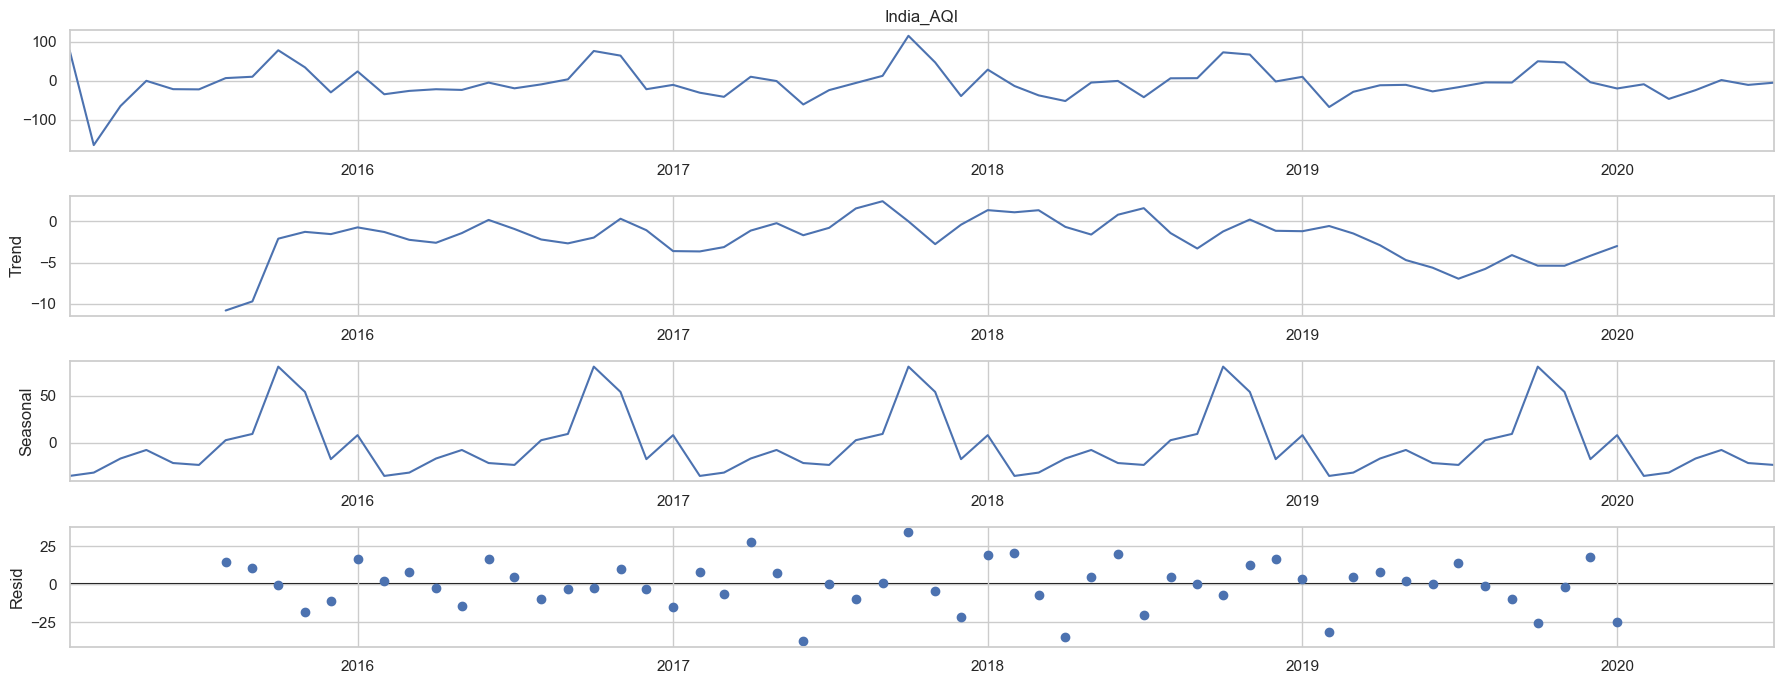

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
diff = cities['India_AQI'].diff(periods=1)
diff.dropna(inplace=True)
fig = seasonal_decompose(diff, model='additive').plot()

In [37]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.385232e+00
p-value                        2.448599e-13
Number of Lags Used            9.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


#### With only one level of differencing, the test statistic of -8.385232e+00 is likely smaller than the critical value, indicating strong evidence against the null hypothesis. Additionally, the very small p-value of 2.448599e-13 suggests that the results are statistically significant.

#### Therefore, based on the provided results, we can conclude that the time series under examination is likely stationary.

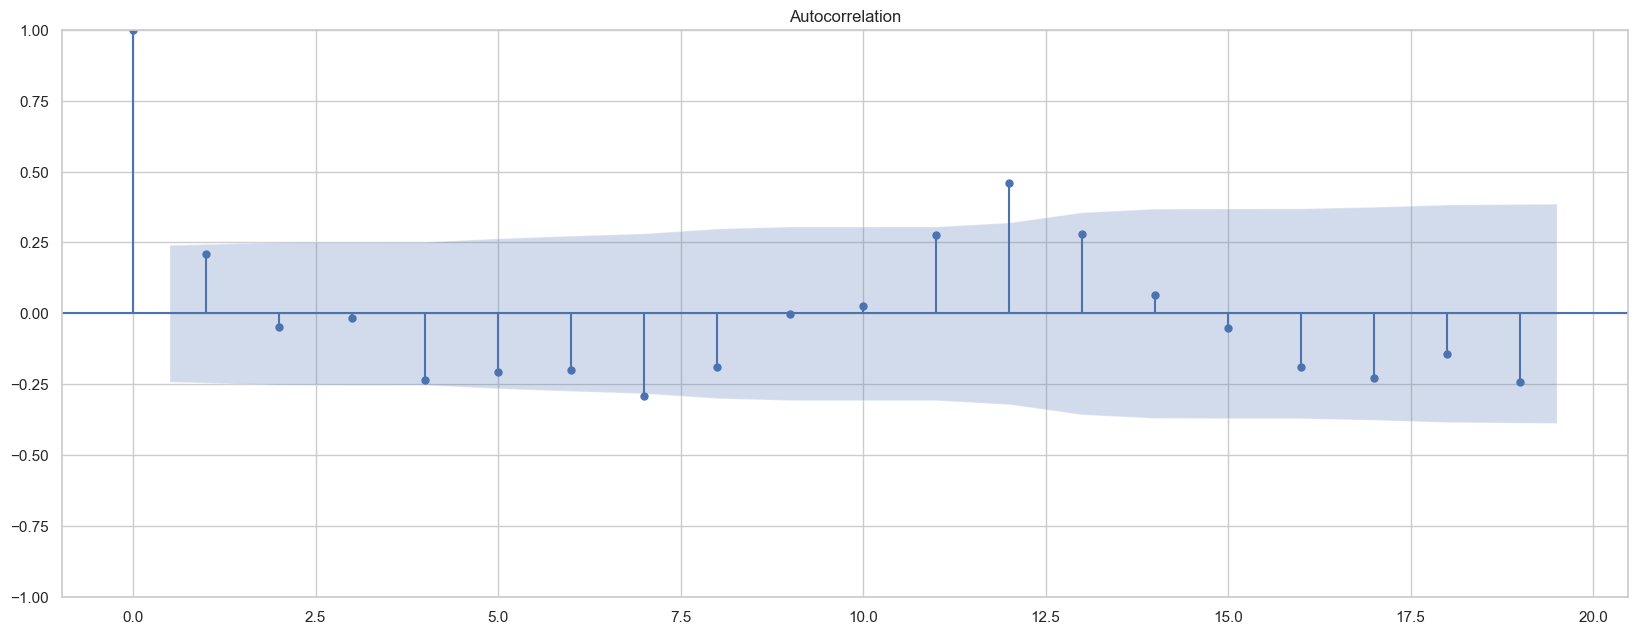

In [38]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(diff)
plt.show()

### BONUS TASK
### This part contains the following:

#### 1. Defining Your Parameters
#### 2. Splitting the Data
#### 3. Running and Fitting the Model
#### 4. Iterating

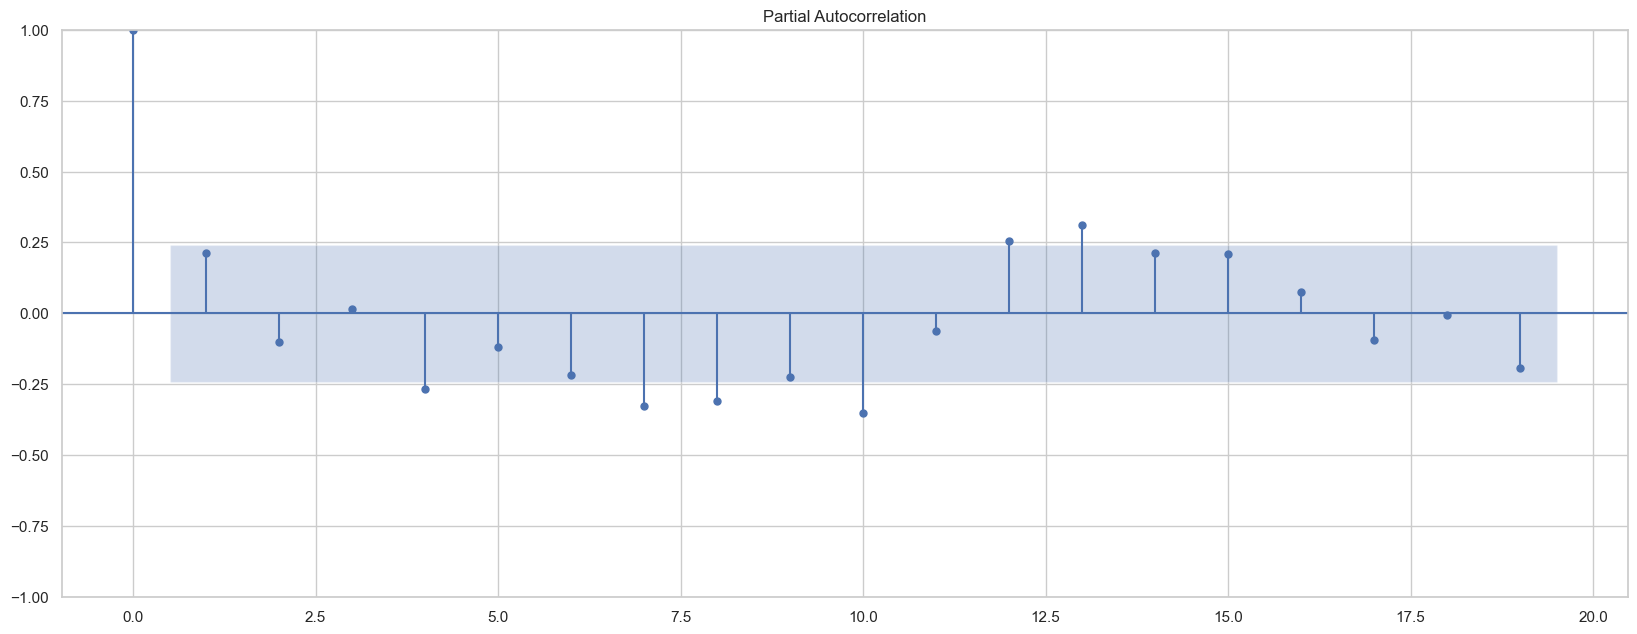

<Figure size 4500x4500 with 0 Axes>

In [39]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

#### In the figure above, you can see that you have some highly positive bars. These indicate some correlations. Let’s start by picking 3 AR terms to compensate for the highest of the partial autocorrelations. This makes p = 3.

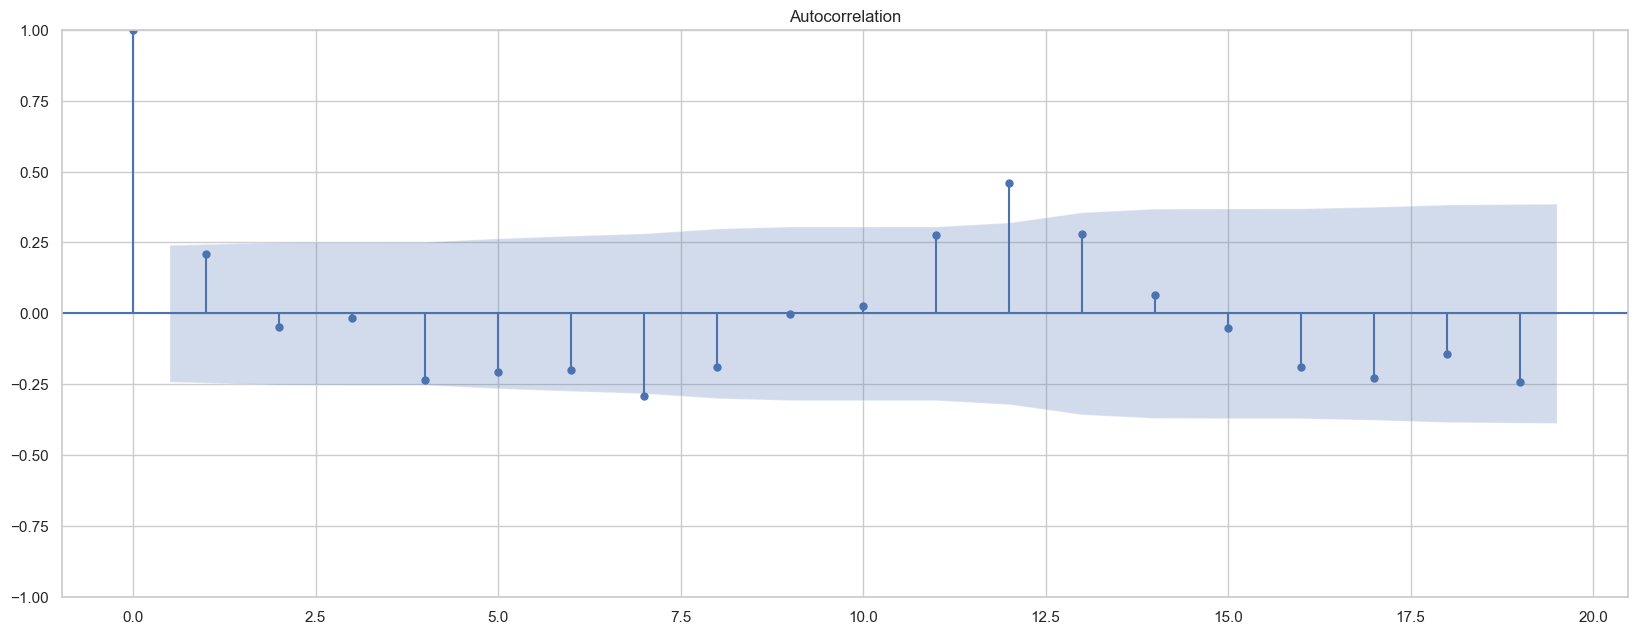

<Figure size 1500x300 with 0 Axes>

In [40]:
# Plot autocorrelations to determine parameter q

plot_acf(diff)
plt.figure(figsize=(15,3), dpi=100)
plt.show()

### 2. Splitting the Data

In [41]:
# Split the data
train = cities['India_AQI'].loc[:'2018-12']
test = cities['India_AQI'].loc['2019-01':]

#### Considering the unforeseen AQI values observed during the COVID-19 lockdown in 2020, which may have had a significant impact, we anticipate a wider margin of error in our AQI value forecasts for 2021.

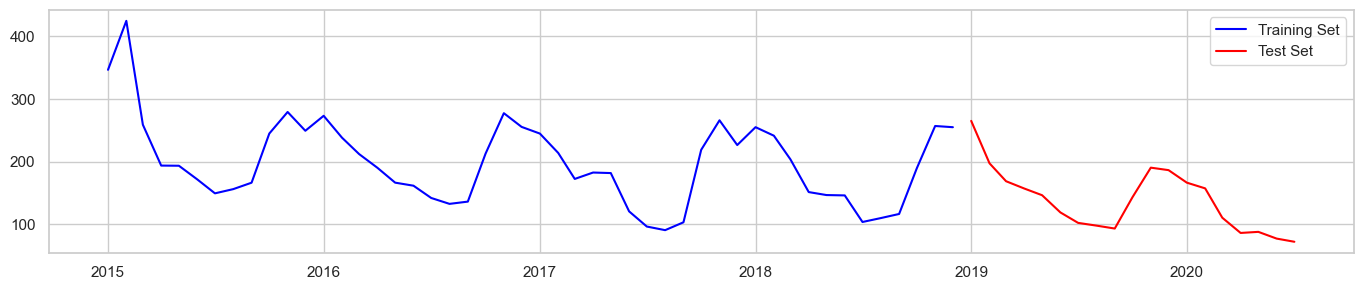

In [42]:
# Plot both sets to visualize the split
plt.figure(figsize=(15, 3), dpi=100)
plt.plot(train, color='blue', label='Training Set')
plt.plot(test, color='red', label='Test Set')
plt.legend()
plt.show()


In [52]:
test.shape

(19,)

### 3. Running and Fitting the Model

In [53]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:              India_AQI   No. Observations:                   48
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -236.116
Date:                Thu, 29 Jun 2023   AIC                            490.232
Time:                        12:19:27   BIC                            506.883
Sample:                    01-01-2015   HQIC                           496.498
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6666      0.760      0.877      0.380      -0.822       2.156
ar.L2          0.0378      0.410      0.092      0.927      -0.766       0.842
ar.L3         -0.0524      0.305     -0.172      0.8

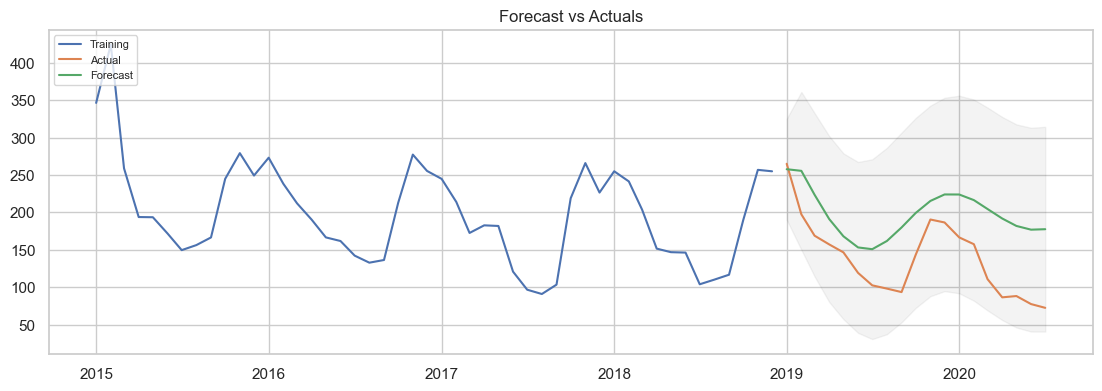

In [54]:
model = ARIMA(train, order=(5, 1, 3))
fitted = model.fit()
print(fitted.summary())  # Check model summary

# Generate forecasted values
forecast = fitted.get_forecast(steps=len(test), alpha=0.05)

# Extract the forecasted values and confidence intervals
fc_series = forecast.predicted_mean  # Forecasted values
conf_int = forecast.conf_int()  # Confidence intervals

# Convert forecasted values to a pandas series
fc_series = pd.Series(fc_series, index=test.index)  # Forecasted values

# Generate lower and upper bounds of the confidence interval
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)  # Lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)  # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.05)  # Confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


### 4. Iterating

                               SARIMAX Results                                
Dep. Variable:              India_AQI   No. Observations:                   48
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -242.768
Date:                Thu, 29 Jun 2023   AIC                            495.536
Time:                        12:19:31   BIC                            504.787
Sample:                    01-01-2015   HQIC                           499.017
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4833      0.265     -1.822      0.068      -1.003       0.036
ar.L2         -0.1298      0.208     -0.624      0.533      -0.538       0.278
ar.L3          0.0177      0.320      0.055      0.9

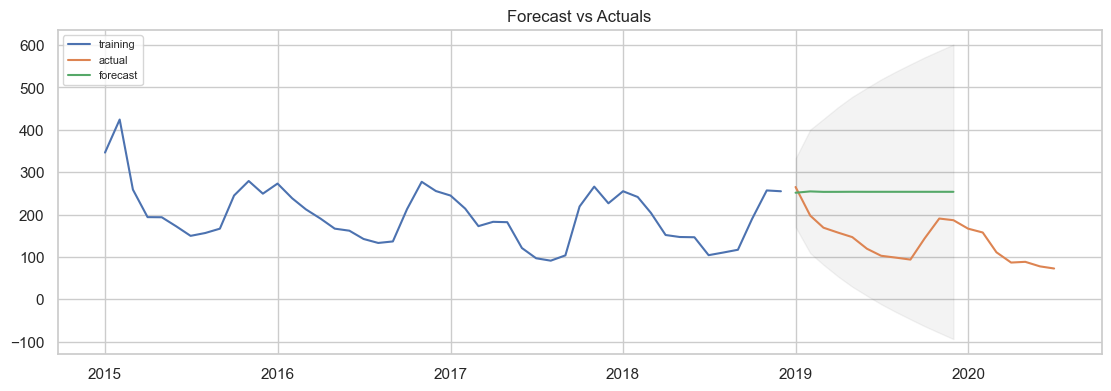

In [55]:
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(steps=12, alpha=0.05)

# Extract forecasted values and confidence intervals
fc_series = forecast.predicted_mean
lower_series = forecast.conf_int().iloc[:, 0]
upper_series = forecast.conf_int().iloc[:, 1]

# Make into pandas series
fc_series = pd.Series(fc_series, index=test.index)
lower_series = pd.Series(lower_series, index=test.index[:len(lower_series)])
upper_series = pd.Series(upper_series, index=test.index[:len(upper_series)])


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:              India_AQI   No. Observations:                   48
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -239.651
Date:                Thu, 29 Jun 2023   AIC                            487.303
Time:                        12:19:35   BIC                            494.703
Sample:                    01-01-2015   HQIC                           490.087
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4044      0.250      1.617      0.106      -0.086       0.894
ma.L1          0.0009   1559.120   5.78e-07      1.000   -3055.818    3055.820
ma.L2         -0.9991   1553.333     -0.001      0.9

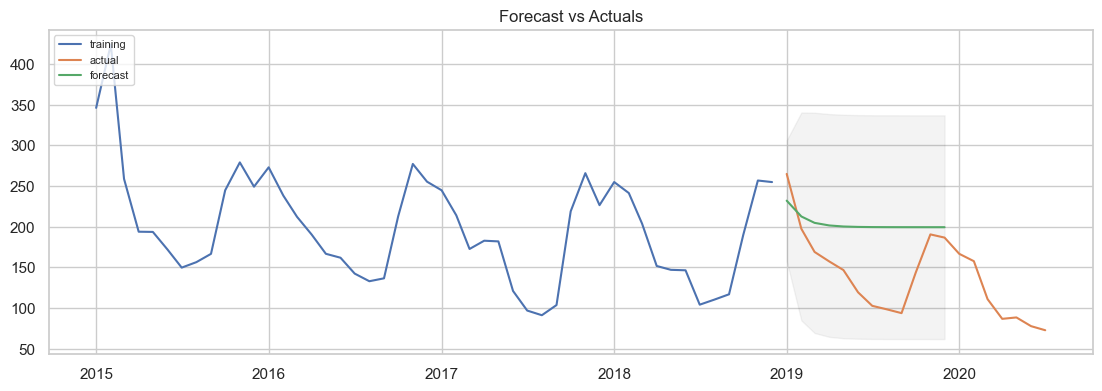

In [56]:
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(steps=12, alpha=0.05)

# Extract forecasted values and confidence intervals
fc_series = forecast.predicted_mean
lower_series = forecast.conf_int().iloc[:, 0]
upper_series = forecast.conf_int().iloc[:, 1]

# Make into pandas series
fc_series = pd.Series(fc_series, index=test.index)
lower_series = pd.Series(lower_series, index=test.index[:len(lower_series)])
upper_series = pd.Series(upper_series, index=test.index[:len(upper_series)])


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [57]:
# Exporting final data set as pkl. format
diff.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'city_day_final.pkl'))

In [58]:
# Exporting final data set as csv format
diff.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_day_final.csv'))